# Exercise 9: Numerical
# Duy Tommy Tran

#### Importing library

In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.integrate import odeint
from scipy import fftpack
from matplotlib.colors import LogNorm

from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib notebook
%matplotlib inline

In [2]:
# Defining some figure parameters
mpl.rcParams.update({'figure.figsize': (10.0, 7),                     # Figuresize
                     'legend.fontsize': 17, 'legend.handlelength': 3, # Legend
                     'xtick.labelsize': 15, 'ytick.labelsize': 15,    # Tick-sizes of the axes
                     'font.size': 15})                                # Fontsize

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

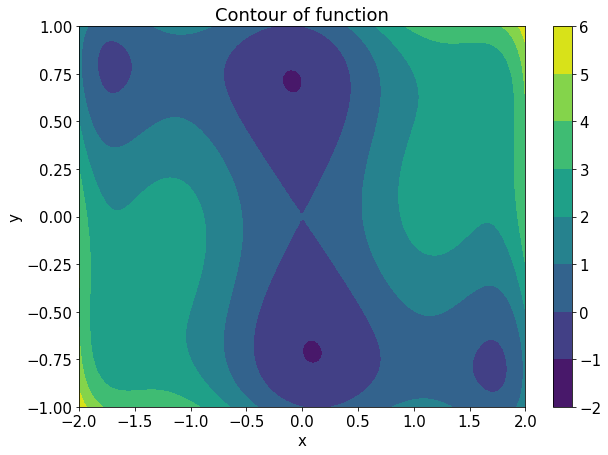

From the figure we can see that there are four minimas.
There are two lower points that are most likely global minima. We will look into these.


In [3]:
# Function
def f(params):
    x,y = params
    return (4 - 2.1*x**2 + (x**4)/3) * x**2 + x*y + (4*y**2 - 4)*y**2

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

xx, yy = np.meshgrid(x, y)
z = f([xx,yy])

# Finding minima
plt.title('Contour of function')
plt.contourf(x,y,z)
plt.xlabel('x'), plt.ylabel('y')
plt.colorbar()
plt.show()

print('From the figure we can see that there are four minimas.')
print('There are two lower points that are most likely global minima. We will look into these.')

In [4]:
# Looking into the two global minima
sol1 = optimize.minimize(f, [0.0, -0.75])
sol2 = optimize.minimize(f, [0.0, 0.75])

print(f'The two points are: {sol1["x"]} and {sol2["x"]}.')
print(f'The function values at these points are: {f(sol1["x"])} and {f(sol2["x"])}.')

The two points are: [ 0.08984201 -0.71265642] and [-0.08984202  0.71265641].
The function values at these points are: -1.0316284534898743 and -1.0316284534898768.


In [5]:
print(f'Initial guess (x,y)=(0,0) yields: {optimize.minimize(f, [0, 0])["x"]}.')
print(f'The initial guess is between two minima points that are equally distanced from (0,0),')
print(f'which causes the algorithm to diverge.\n')
print(f'If we shift it slightly to (x,y)=(0,0.01) we get: {optimize.minimize(f, [0, 0.01])["x"]}, which')
print(f'is one of the points because now it converges.')

Initial guess (x,y)=(0,0) yields: [0. 0.].
The initial guess is between two minima points that are equally distanced from (0,0),
which causes the algorithm to diverge.

If we shift it slightly to (x,y)=(0,0.01) we get: [-0.08984158  0.71265651], which
is one of the points because now it converges.


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\Omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

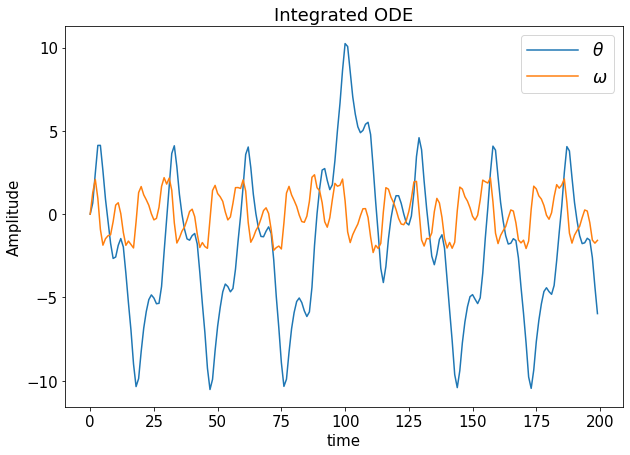

In [6]:
# Defining the ODE
def derivative(X, t, Q, d, Omega):
    theta, w = X
    return w, -1/Q*w + np.sin(theta) + d*np.cos(Omega*t)

# Initial conditions theta0 and w0
Xinit = [0,0]

# Other variables
Q = 2.0
d = 1.5
Omega = 0.65
t = np.arange(200)

# Solving the ODE
X = odeint(derivative, Xinit, t, args=(Q, d, Omega))

# Plotting
plt.title('Integrated ODE')
plt.plot(t, X[:, 0], label=r'$\theta$')
plt.plot(t, X[:, 1], label=r'$\omega$')
plt.xlabel('time'), plt.ylabel('Amplitude')
plt.legend()
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [7]:
# Read from datafile
file_name = './data/populations.txt'
data = pd.read_csv(file_name, sep=('\t'))

hare = data['hare'].to_numpy()
lynx = data['lynx'].to_numpy()


# Create function to find period
def period(data):
    # FFT
    fft = fftpack.fft(data)
    
    # Power
    power = np.abs(fft)
    
    # Frequencies
    dt = 1
    sample_freq = fftpack.fftfreq(data.size, d=dt)
    
    # Peak frequency: focus only on only the positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    
    # Max of freqs array
    peak_freq = freqs[powes.argmax()]
    
    print(f'Peak frequency: {peak_freq:.5f}')
    print(f'Period: {1/peak_freq}\n')


# Frequency and period of the populations
print(f'Hare:')
period(hare)
print(f'Lynx:')
period(lynx)
print('We can see that the periods are the same for hare and lynx. This makes sense because their change in populations correlate.')

Hare:
Peak frequency: 0.09524
Period: 10.5

Lynx:
Peak frequency: 0.09524
Period: 10.5

We can see that the periods are the same for hare and lynx. This makes sense because their change in populations correlate.


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

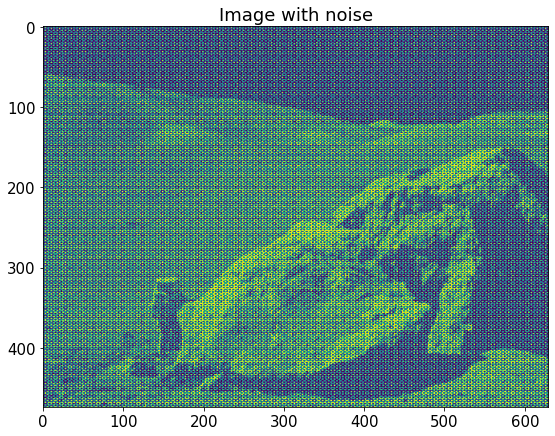

In [8]:
image = plt.imread('data/moonlanding.png')

plt.title('Image with noise')
plt.imshow(image)
plt.show()

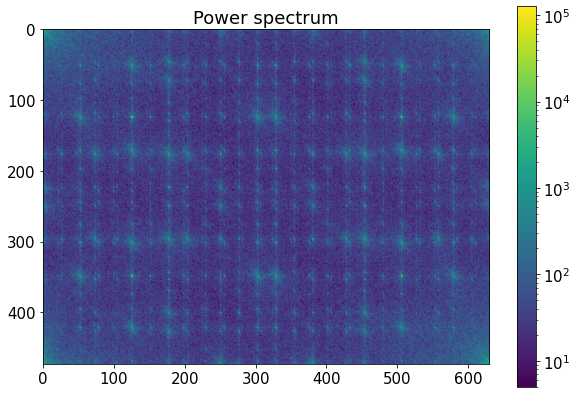

In [9]:
image_fft = fftpack.fft2(image)

plt.title('Power spectrum')
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
plt.colorbar()
plt.show()

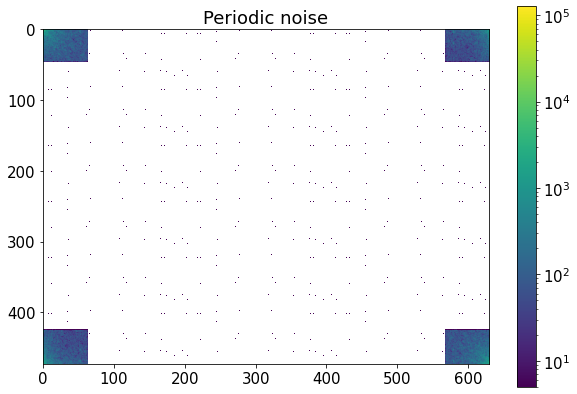

In [10]:
frac = 0.1

r, c = image_fft.shape
fft_filter = image_fft.copy()

# rows
fft_filter[int(r*frac):int(r*(1-frac))] = 0

# columns
fft_filter[:, int(c*frac):int(c*(1-frac))] = 0

plt.title('Periodic noise')
plt.imshow(np.abs(fft_filter), norm=LogNorm(vmin=5))
plt.colorbar()
plt.show()

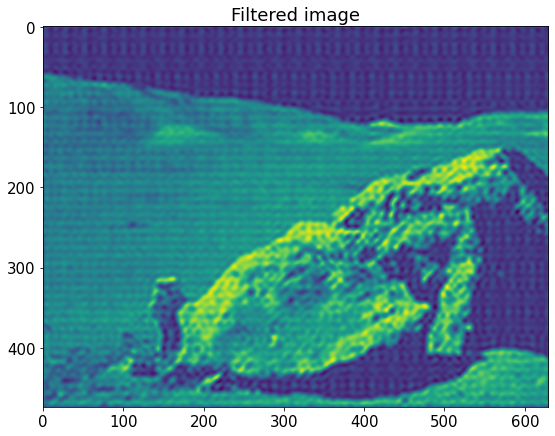

In [11]:
image_filtered = fftpack.ifft2(fft_filter).real

plt.title('Filtered image')
plt.imshow(image_filtered)
plt.show()